In [1]:
# 기본 패키지 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [3]:
from konlpy.tag import Kkma
from konlpy.tag import Mecab

import collections
from collections import Counter

In [4]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [5]:
# CSV 파일 로드
raw_df = pd.read_csv('Data/Statistics_purpose_Prepreprocessing_compleated.csv')
df = raw_df.copy() # 복사
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt  
0       2018      1            12000  
1       2018      1            25000  
2       2018      1            12000  
3       2018      1            15000  
4       2018      1             7725  
...      ...    ...              ...  
293781  2019     12            49700  
293782  2019     12            95100  
293783  2019     12           122300  
293784  2019     12            17000  
293785  2019     12            16795  

[293786 rows x 10 columns]

In [6]:
df['token'] = df['crdCoBzkNm'].apply(mecab.nouns)
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
0       2018      1            12000              [양식]  
1       2018      1            25000     [일반, 음식점, 기타]  
2       2018      1            12000      [일식, 생선, 회집]  
3       2018      1            15000              [중식]  
4       2018      1             7725     [커피, 음료, 전문점]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[293786 rows x 11 columns]

## 전체 기준 토큰 빈도 그래프

In [7]:
df_list = []
for df_t in df['token']:
    df_list += df_t

In [8]:
CC = Counter(df_list).most_common()
CC

[('기타', 31839),
 ('점', 14072),
 ('용품', 13615),
 ('일반', 8416),
 ('기기', 6403),
 ('학원', 6181),
 ('스포츠', 6128),
 ('판매', 5559),
 ('의류', 5556),
 ('종합', 5235),
 ('판매점', 4958),
 ('병원', 4670),
 ('통신', 4527),
 ('식품', 4410),
 ('서비스', 4378),
 ('자동차', 3790),
 ('농협', 3769),
 ('주방', 3762),
 ('전자', 3709),
 ('의료', 3693),
 ('제조', 3434),
 ('제품', 3432),
 ('전문점', 3286),
 ('사무', 3286),
 ('건강', 3277),
 ('보험', 3227),
 ('매장', 3208),
 ('레져', 3144),
 ('소', 3118),
 ('교육', 3066),
 ('컴퓨터', 3059),
 ('상거래', 3058),
 ('기구', 2997),
 ('가구', 2976),
 ('충전', 2867),
 ('기계', 2845),
 ('주유소', 2840),
 ('가스', 2838),
 ('음식점', 2781),
 ('기관', 2767),
 ('건축', 2760),
 ('레저', 2744),
 ('차량', 2716),
 ('대형', 2545),
 ('의원', 2527),
 ('치과', 2486),
 ('부품', 2399),
 ('인테리어', 2366),
 ('복점', 2345),
 ('센터', 2302),
 ('쇼핑', 2255),
 ('대학', 2218),
 ('정수기', 2195),
 ('자재', 2143),
 ('업', 2141),
 ('급호', 2110),
 ('텔', 2110),
 ('복지', 2107),
 ('동물', 2100),
 ('정비', 2078),
 ('시설', 2062),
 ('장', 2048),
 ('제약', 2041),
 ('호텔', 2009),
 ('인터넷', 1999),
 ('서적', 1970),

In [9]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 수단 퓨 렌 영 소" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분
result=[]

for w in CC:
    if w[0] not in stop_words:
        result.append(w)

In [10]:
result= result[:10]

In [31]:
#res_dict = dict(result) # 리스트를 딕셔너리로

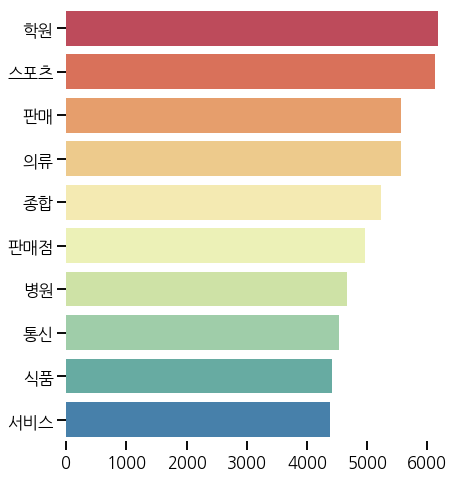

In [11]:
x, y= [], [] 
for word,count in result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(7,8))
pal = sns.color_palette("Spectral",10) # GnBu_r Spectral Set2
sns.set_context("talk")
sns.barplot(x=y, y=x, palette=pal)
sns.despine(left=True, bottom=True)
plt.savefig('전체 기준 토큰 빈도 그래프-색상변경.png',dpi=300)

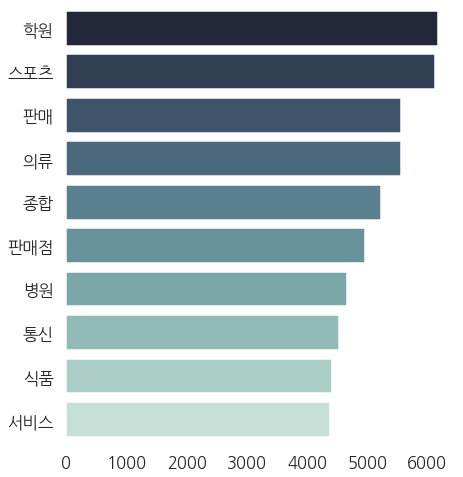

In [77]:
x, y= [], [] 
for word,count in result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(7,8))
pal = sns.cubehelix_palette(10, rot=-0.3, reverse=True)
sns.set_context("talk")
sns.barplot(x=y, y=x, palette=pal)
sns.despine(left=True, bottom=True)
plt.savefig('전체 기준 토큰 빈도 그래프-T.png',dpi=300)

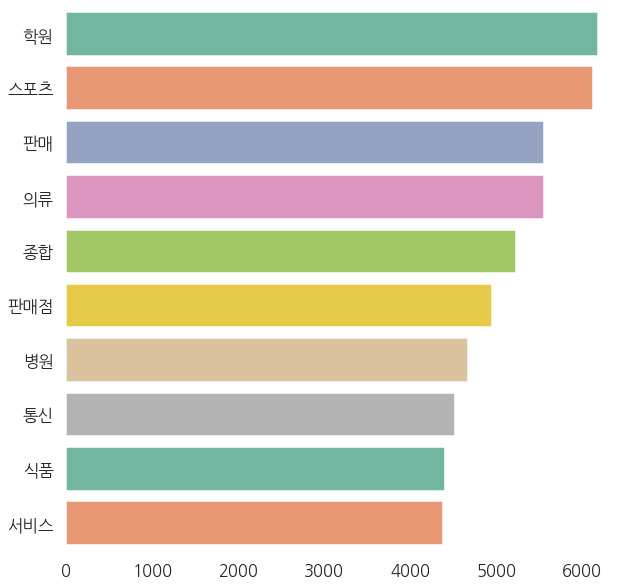

In [104]:
x, y= [], [] 
for word,count in result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10))
pal = sns.color_palette("Set2",10)
#sns.set_context("poster")
sns.barplot(x=y, y=x, palette=pal)
sns.despine(left=True, bottom=True)
plt.savefig('전체 기준 토큰 빈도 그래프-P2.png')

## 남성 기준 토큰 빈도

In [16]:
man_df = df.groupby('sxClNm').get_group('남')
man_df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  \
0                 양식        가족식사      남      가정친화    10대      12000   
1            일반음식점기타        가족식사      남      가정친화    10대     100000   
2             일식생선회집        가족식사      남      가정친화    10대      12000   
3                 중식        가족식사      남      가정친화    10대      30000   
4            커피음료전문점        가족식사      남      가정친화    10대      30900   
...              ...         ...    ...       ...    ...        ...   
147487       할인점슈퍼마켓  생활편의시설(유통)      남      여가생활    80대      17100   
147488         PG쇼핑몰       전자상거래      남      여가생활    80대     124300   
147489  전자상거래안심클릭미적용       전자상거래      남      여가생활    80대     174800   
147490       전자상거래PG       전자상거래      남      여가생활    80대     236360   
147491           홈쇼핑       전자상거래      남      여가생활    80대      34900   

        crdUseCnt  Year  Mouth  crdUseAmt_D_Cnt                     token  
0               1  2018      1            12000                      [양식]  
1               4  2018      1            25000             [일반, 음식점, 기타]  
2               1  2018      1            12000              [일식, 생선, 회집]  
3               2  2018      1            15000                      [중식]  
4               4  2018      1             7725             [커피, 음료, 전문점]  
...           ...   ...    ...              ...                       ...  
147487          1  2020     12            17100               [할인점, 슈퍼마켓]  
147488          3  2020     12            41433                     [쇼핑몰]  
147489          3  2020     12            58266  [전자, 상거래, 안심, 클릭, 미, 적용]  
147490          1  2020     12           236360                 [전자, 상거래]  
147491          1  2020     12            34900                   [홈, 쇼핑]  

[147492 rows x 11 columns]

In [17]:
man_list=[]
for man in man_df['token']:
    man_list += man

In [18]:
man_list

['양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '제과점',
 '아이스크림',
 '점',
 '가전제품',
 '점',
 '컴퓨터',
 '소프트웨어',
 '주유소',
 '일반',
 '치과',
 '의원',
 '약국',
 '생명',
 '보험',
 '문방구점',
 '서점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '철도',
 '비디오',
 '도서대',
 '여점',
 '공연장',
 '극장',
 '영화관',
 '공공',
 '기관',
 '직영',
 '점',
 '슈퍼마켓',
 '편의점',
 '하나',
 '마트',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '커피',
 '전문점',
 '패밀리',
 '레스토랑',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '제과점',
 '아이스크림',
 '점',
 '기성',
 '복점',
 '농협',
 '주유소',
 '주유소',
 '약국',
 '자동차',
 '학원',
 '서점',
 '종합',
 '스포츠',
 '센터',
 '화장품',
 '점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '고속버스',
 '철도',
 '공공',
 '기관',
 '직영',
 '점',
 '대형',
 '마트',
 '백화점',
 '슈퍼마켓',
 '편의점',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '가정용품',
 '수리',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집

In [20]:
man_c = Counter(man_list).most_common()

In [21]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 수단 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분
man_result=[]

for w in man_c:
    if w[0] not in stop_words:
        man_result.append(w)

In [22]:
man_result

[('학원', 3091),
 ('스포츠', 3057),
 ('판매', 2801),
 ('의류', 2668),
 ('종합', 2638),
 ('판매점', 2509),
 ('병원', 2339),
 ('통신', 2225),
 ('서비스', 2222),
 ('식품', 2174),
 ('자동차', 1971),
 ('농협', 1937),
 ('전자', 1896),
 ('주방', 1893),
 ('의료', 1813),
 ('제조', 1746),
 ('제품', 1677),
 ('보험', 1670),
 ('전문점', 1667),
 ('매장', 1644),
 ('사무', 1630),
 ('소', 1627),
 ('건강', 1613),
 ('레져', 1563),
 ('상거래', 1562),
 ('컴퓨터', 1545),
 ('기구', 1536),
 ('주유소', 1504),
 ('가구', 1494),
 ('충전', 1489),
 ('가스', 1480),
 ('교육', 1473),
 ('건축', 1436),
 ('음식점', 1431),
 ('차량', 1430),
 ('기계', 1405),
 ('레저', 1391),
 ('기관', 1373),
 ('대형', 1309),
 ('치과', 1273),
 ('의원', 1268),
 ('부품', 1252),
 ('인테리어', 1192),
 ('센터', 1182),
 ('복점', 1151),
 ('대학', 1142),
 ('쇼핑', 1121),
 ('정수기', 1107),
 ('정비', 1104),
 ('자재', 1101),
 ('복지', 1067),
 ('급호', 1061),
 ('텔', 1061),
 ('업', 1051),
 ('인터넷', 1045),
 ('동물', 1025),
 ('제약', 1021),
 ('장', 1018),
 ('시설', 1016),
 ('서적', 985),
 ('호텔', 983),
 ('도매', 959),
 ('수리', 955),
 ('일식', 949),
 ('마트', 947),
 ('슈퍼마켓', 945),
 ('관광호

In [23]:
man_result = man_result[:20]

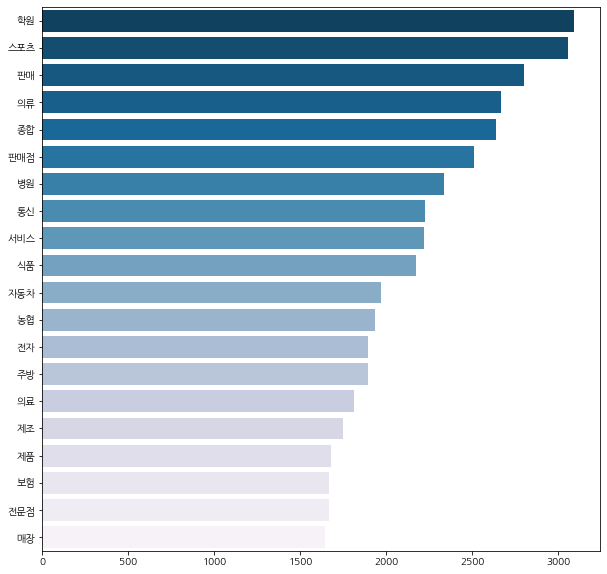

In [24]:
x, y= [], [] 
for word,count in man_result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10)) 
pal = sns.color_palette("PuBu_r",20) # Blues_r
sns.barplot(x=y, y=x, palette=pal)
plt.savefig('남성 기준 토큰 빈도-색상 1안.png')

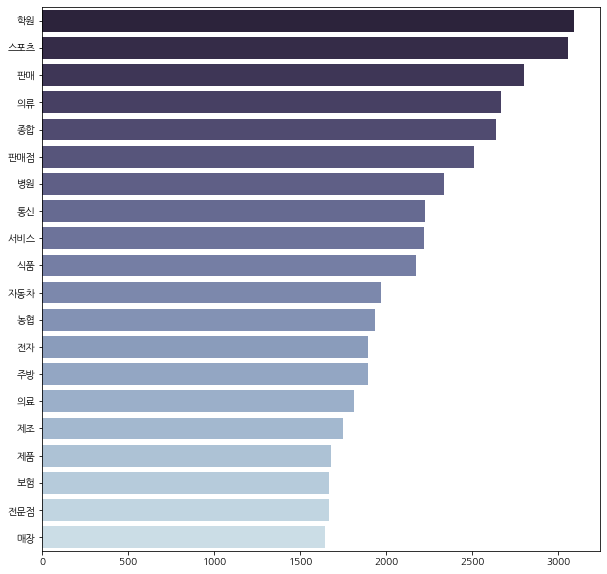

In [25]:
x, y= [], [] 
for word,count in man_result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10)) 
pal = sns.color_palette("ch:s=.25,rot=-.25_r",20)
sns.barplot(x=y, y=x, palette=pal)
plt.savefig('남성 기준 토큰 빈도-색상 2안.png')

## 여성 기준 토큰 빈도

In [26]:
wo_df = df.groupby('sxClNm').get_group('여')
wo_df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
147492     일식생선회집        가족식사      여      가정친화    10대      33500          2   
147493         중식        가족식사      여      가정친화    10대      18000          1   
147494    커피음료전문점        가족식사      여      가정친화    10대      16000          1   
147495      커피전문점        가족식사      여      가정친화    10대     106000         12   
147496      패스트푸드        가족식사      여      가정친화    10대       9800          2   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
147492  2018      1            16750      [일식, 생선, 회집]  
147493  2018      1            18000              [중식]  
147494  2018      1            16000     [커피, 음료, 전문점]  
147495  2018      1             8833         [커피, 전문점]  
147496  2018      1             4900           [패스트푸드]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[146294 rows x 11 columns]

In [29]:
wo_list = []
for wo in wo_df['token']:
    wo_list += wo
wo_list

['일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '정육점',
 '제과점',
 '제과점',
 '아이스크림',
 '점',
 '제과점',
 '아이스크림',
 '점',
 '기성',
 '복점',
 '기타',
 '의류',
 '남여',
 '기성복',
 '내',
 '판매점',
 '악세사리',
 '점',
 '주유소',
 '주차장',
 '일반',
 '치과',
 '한방',
 '병원',
 '일반',
 '치과',
 '의원',
 '종합',
 '병원',
 '약국',
 '문방구점',
 '서점',
 '화장품',
 '점',
 '교통',
 '기관',
 '수수료',
 '선취',
 '고속',
 '시외버스',
 '고속버스',
 '철도',
 '택시',
 '애완',
 '동물',
 '영화관',
 '대형',
 '마트',
 '백화점',
 '슈퍼마켓',
 '편의점',
 '하나',
 '마트',
 '할인점',
 '슈퍼마켓',
 '인터넷',
 '쇼핑몰',
 '전자',
 '상거래',
 '전자',
 '상거래',
 '안심',
 '클릭',
 '미',
 '적용',
 '전자',
 '상거래',
 '전자',
 '상거래',
 '오픈',
 '마켓',
 '사진관',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '기타',
 '휴게',
 '음식점',
 '양식',
 '일반',
 '음식점',
 '기타',
 '일반',
 '음식점',
 '기타',
 '일식',
 '생선',
 '회집',
 '일식',
 '생선',
 '회집',
 '중식',
 '커피',
 '음료',
 '전문점',
 '커피',
 '전문점',
 '패스트푸드',
 '패스트푸드',
 '점',
 '한식',
 '휴게',
 '음식점',
 '정육점',
 '제과점',
 '제과점',
 '아이스크림',
 '점',
 '제과점',
 

In [30]:
wo_c = Counter(wo_list).most_common()

In [31]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 수단 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

wo_result=[]

for w in wo_c:
    if w[0] not in stop_words:
        wo_result.append(w)

In [32]:
wo_result

[('학원', 3090),
 ('스포츠', 3071),
 ('의류', 2888),
 ('판매', 2758),
 ('종합', 2597),
 ('판매점', 2449),
 ('병원', 2331),
 ('통신', 2302),
 ('식품', 2236),
 ('서비스', 2156),
 ('의료', 1880),
 ('주방', 1869),
 ('농협', 1832),
 ('자동차', 1819),
 ('전자', 1813),
 ('제품', 1755),
 ('제조', 1688),
 ('건강', 1664),
 ('사무', 1656),
 ('전문점', 1619),
 ('교육', 1593),
 ('레져', 1581),
 ('매장', 1564),
 ('보험', 1557),
 ('컴퓨터', 1514),
 ('상거래', 1496),
 ('소', 1491),
 ('가구', 1482),
 ('기구', 1461),
 ('기계', 1440),
 ('기관', 1394),
 ('충전', 1378),
 ('가스', 1358),
 ('레저', 1353),
 ('음식점', 1350),
 ('주유소', 1336),
 ('건축', 1324),
 ('차량', 1286),
 ('의원', 1259),
 ('대형', 1236),
 ('치과', 1213),
 ('복점', 1194),
 ('인테리어', 1174),
 ('부품', 1147),
 ('쇼핑', 1134),
 ('센터', 1120),
 ('업', 1090),
 ('정수기', 1088),
 ('대학', 1076),
 ('동물', 1075),
 ('급호', 1049),
 ('텔', 1049),
 ('시설', 1046),
 ('자재', 1042),
 ('복지', 1040),
 ('장', 1030),
 ('호텔', 1026),
 ('제약', 1020),
 ('서적', 985),
 ('정비', 974),
 ('인터넷', 954),
 ('도매', 935),
 ('침구', 928),
 ('슈퍼마켓', 920),
 ('특급', 919),
 ('관광호텔', 907),
 ('마트

In [33]:
wo_result = wo_result[:20]

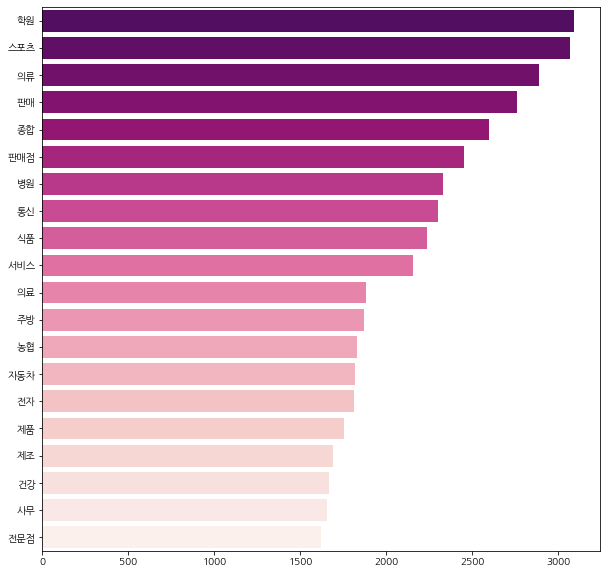

In [34]:
x, y= [], [] 
for word,count in wo_result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10))
pal = sns.color_palette('RdPu_r',20) # flare_r RdPu_r
sns.barplot(x=y, y=x, palette=pal)
#plt.savefig('여성 기준 토큰 빈도-색상 1안.png')

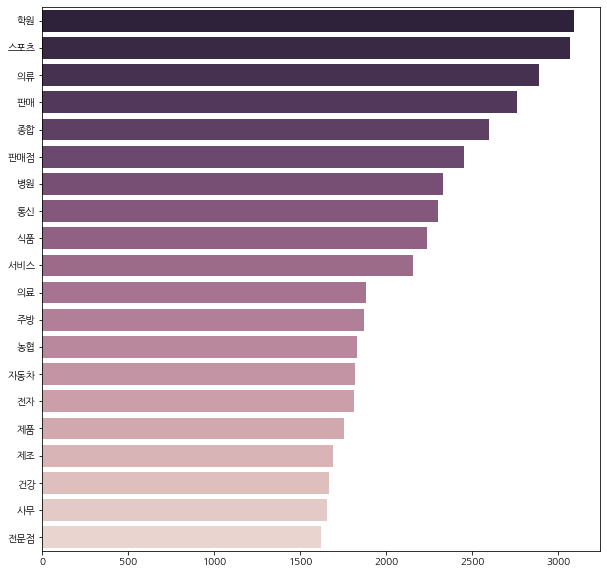

In [35]:
x, y= [], [] 
for word,count in wo_result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10))
pal = sns.cubehelix_palette(20, rot=0.4, reverse=True)
sns.barplot(x=y, y=x, palette=pal)
#plt.savefig('여성 기준 토큰 빈도-색상 2안.png')

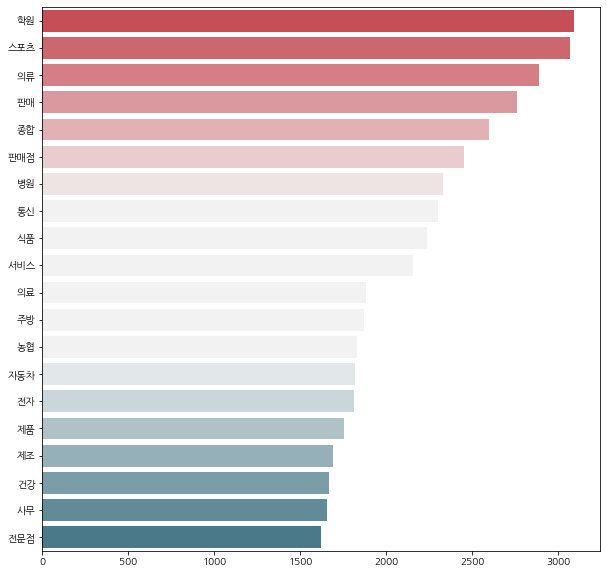

In [36]:
x, y= [], [] 
for word,count in wo_result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10))
pal = sns.diverging_palette(10, 220, sep=80, n=20) # 양쪽색 다르게
sns.barplot(x=y, y=x, palette=pal)
#plt.savefig('여성 기준 토큰 빈도-색상 3안.png')

## 10대 토큰 빈도

In [78]:
age_ten = df.groupby('agePrd').get_group('10대')
age_ten

crdCoBzkNm sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식      가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타      가족식사      남      가정친화    10대     100000          4   
2          일식생선회집      가족식사      남      가정친화    10대      12000          1   
3              중식      가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점      가족식사      남      가정친화    10대      30900          4   
...           ...       ...    ...       ...    ...        ...        ...   
149550    전자상거래PG     전자상거래      여      여가생활    10대    5362267        170   
149551  전자상거래오픈마켓     전자상거래      여      여가생활    10대    1561803         64   
149552      화물운송업     운송/임대      여      여가생활    10대       4000          1   
149553        사진관     용역서비스      여      여가생활    10대      60000          2   
149554        세탁소     용역서비스      여      여가생활    10대     169620          3   

        Year  Mouth  crdUseAmt_D_Cnt              token  
0       2018      1            12000               [양식]  
1       2018      1            25000      [일반, 음식점, 기타]  
2       2018      1            12000       [일식, 생선, 회집]  
3       2018      1            15000               [중식]  
4       2018      1             7725      [커피, 음료, 전문점]  
...      ...    ...              ...                ...  
149550  2020     12            31542          [전자, 상거래]  
149551  2020     12            24403  [전자, 상거래, 오픈, 마켓]  
149552  2020     12             4000          [화물, 운송업]  
149553  2020     12            30000              [사진관]  
149554  2020     12            56540              [세탁소]  

[3613 rows x 11 columns]

In [79]:
ten_list = []
for ten in age_ten['token']:
    ten_list += ten

In [80]:
ten_c = Counter(ten_list).most_common()

In [81]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 수단 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

ten_result=[]

for w in ten_c:
    if w[0] not in stop_words:
        ten_result.append(w)

In [82]:
ten_result = ten_result[:20]
ten_result

[('상거래', 188),
 ('전자', 184),
 ('음식점', 171),
 ('슈퍼마켓', 117),
 ('전문점', 114),
 ('대형', 112),
 ('마트', 102),
 ('커피', 100),
 ('일식', 93),
 ('제과점', 91),
 ('치과', 85),
 ('인터넷', 85),
 ('휴게', 84),
 ('패스트푸드', 73),
 ('편의점', 67),
 ('병원', 67),
 ('의류', 67),
 ('의원', 66),
 ('한식', 65),
 ('주유소', 65)]

<AxesSubplot:>

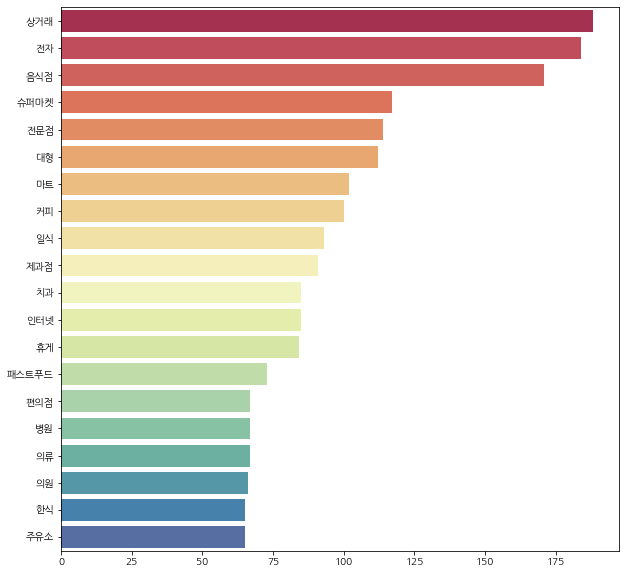

In [84]:
x, y= [], [] 
for word,count in ten_result: 
    x.append(word) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10)) 
pal = sns.color_palette('Spectral',20)
sns.barplot(x=y, y=x, palette=pal)

## 연령별 토큰 빈도

In [37]:
age = df['agePrd'].unique()
age = age.tolist()
age

['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [38]:
age_counts = df['agePrd'].value_counts()
age_counts

40대    59587
50대    58663
30대    58524
20대    51377
60대    50702
70대    10623
10대     3613
80대      697
Name: agePrd, dtype: int64

In [39]:
# 리스트로 변경
count_list = age_counts.tolist()
count_list

[59587, 58663, 58524, 51377, 50702, 10623, 3613, 697]

In [40]:
# 딕셔너리로 변경
age_dict = dict(age_counts)
age_dict

{'40대': 59587,
 '50대': 58663,
 '30대': 58524,
 '20대': 51377,
 '60대': 50702,
 '70대': 10623,
 '10대': 3613,
 '80대': 697}

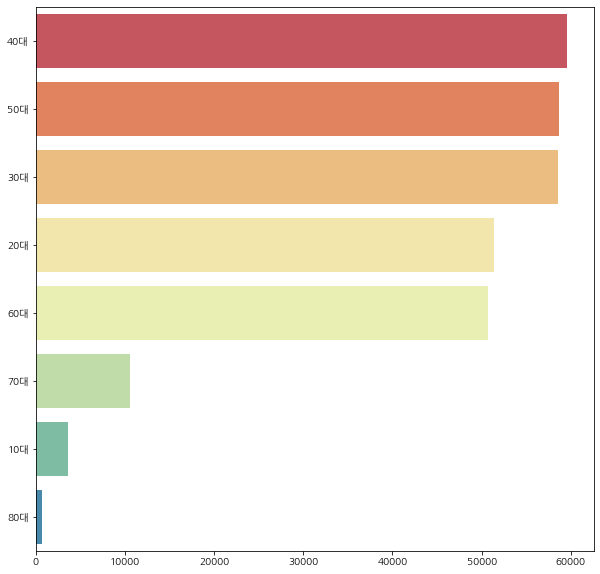

In [41]:
x, y= [], [] 
for age,count in age_dict.items(): 
    x.append(age) 
    y.append(count) 
    
plt.rcParams['font.family'] = 'NanumGothic' 
plt.figure(figsize=(10,10)) 
pal = sns.color_palette('Spectral',8)
sns.barplot(x=y, y=x, palette=pal)
plt.savefig('연령별 토큰 빈도.png')

## 각 연령별 토큰 빈도

In [42]:
age = df['agePrd'].unique()
age_key = age.tolist()
age_key

['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [43]:
stop_words = "기타 일반 용품 기기 점 홈 보 손 수단 부 리 전 옥 회 복 랑 테 접 관 용 완 제외 퓨 렌 영" 
stop_words=stop_words.split(' ') # 띄어쓰기 기준으로 구분

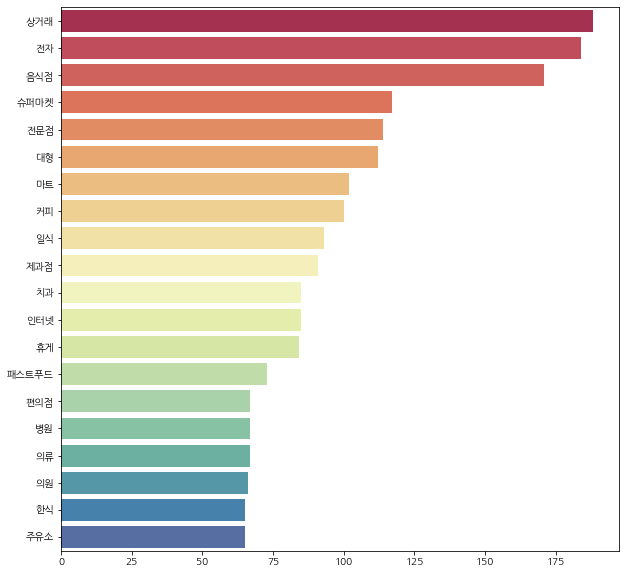

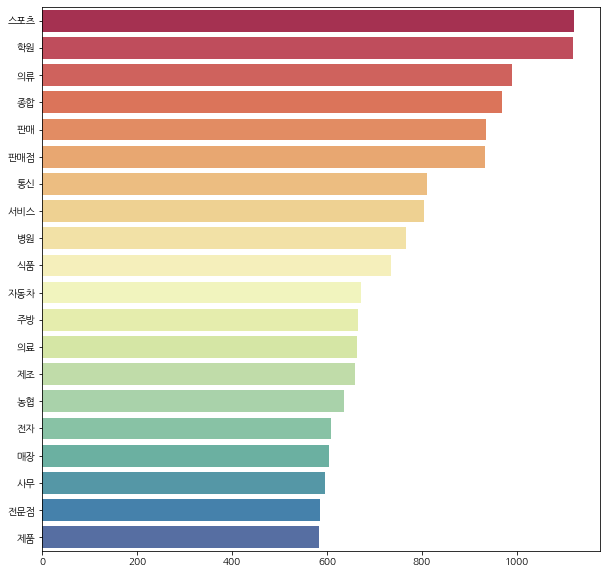

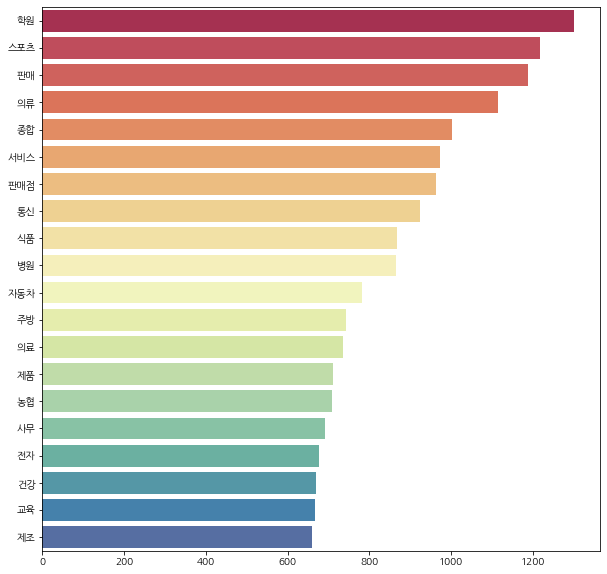

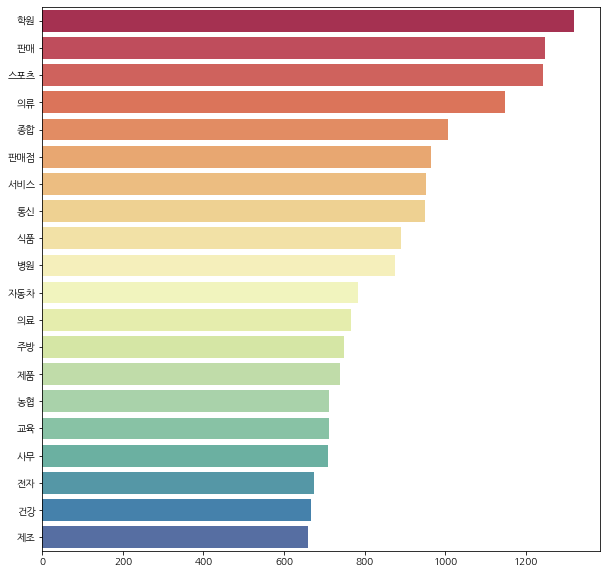

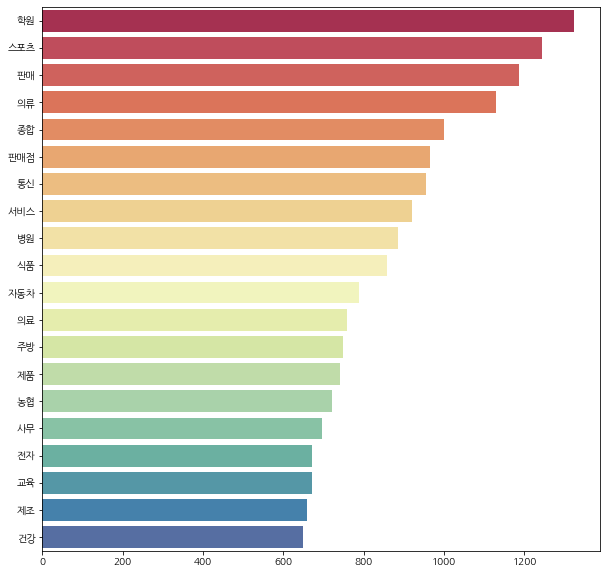

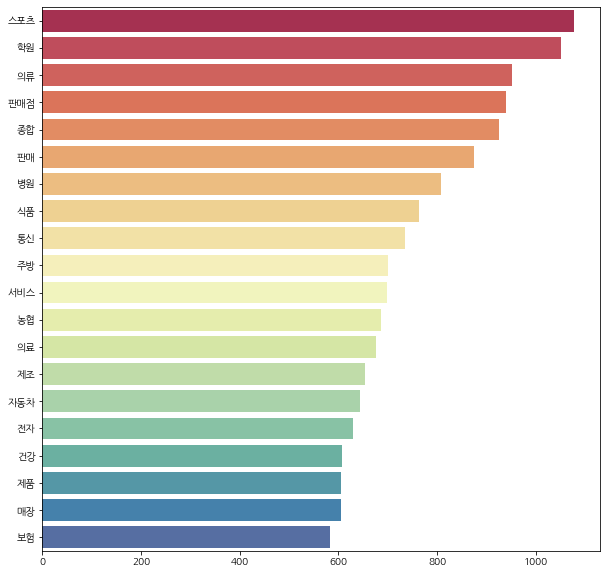

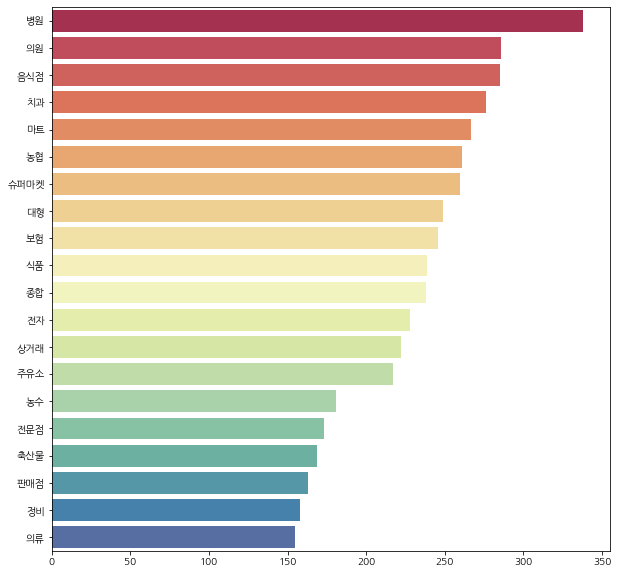

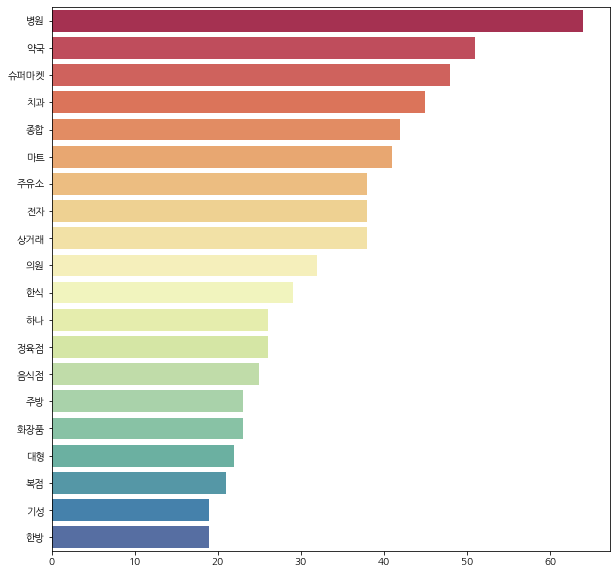

In [85]:
# 그래프 (오래걸림)
age_list = []

for age in age_key:
    age_token = df[df['agePrd']==age]['token']
    
    age_list = []
    for a in age_token:
        age_list += a
        age_c = Counter(age_list).most_common()
        
    age_result = []
    for w in age_c:
        if w[0] not in stop_words:
            age_result.append(w)
    
    age_result = age_result[:20]

    x, y= [], [] 
    for word,count in age_result: 
        x.append(word) 
        y.append(count) 

    plt.rcParams['font.family'] = 'NanumGothic' 
    plt.figure(figsize=(10,10)) 
    pal = sns.color_palette('Spectral',20)
    sns.barplot(x=y, y=x, palette=pal)
    plt.show()
    #plt.savefig('각 연령별 토큰 빈도.png',dpi=300)

## 글자 수, 토큰 수

In [13]:
df

crdCoBzkNm   sndCtgyNm sxClNm fstCtgyNm agePrd  crdUseAmt  crdUseCnt  \
0              양식        가족식사      남      가정친화    10대      12000          1   
1         일반음식점기타        가족식사      남      가정친화    10대     100000          4   
2          일식생선회집        가족식사      남      가정친화    10대      12000          1   
3              중식        가족식사      남      가정친화    10대      30000          2   
4         커피음료전문점        가족식사      남      가정친화    10대      30900          4   
...           ...         ...    ...       ...    ...        ...        ...   
293781   일반치과한방병원       병의원진료      여      건강관리    80대      49700          1   
293782       종합병원       병의원진료      여      건강관리    80대      95100          1   
293783         약국   약국및의료기기구매      여      건강관리    80대     122300          1   
293784       화장품점          미용      여      여가생활    80대      17000          1   
293785       슈퍼마켓  생활편의시설(유통)      여      여가생활    80대     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt             token  
0       2018      1            12000              [양식]  
1       2018      1            25000     [일반, 음식점, 기타]  
2       2018      1            12000      [일식, 생선, 회집]  
3       2018      1            15000              [중식]  
4       2018      1             7725     [커피, 음료, 전문점]  
...      ...    ...              ...               ...  
293781  2019     12            49700  [일반, 치과, 한방, 병원]  
293782  2019     12            95100          [종합, 병원]  
293783  2019     12           122300              [약국]  
293784  2019     12            17000          [화장품, 점]  
293785  2019     12            16795            [슈퍼마켓]  

[293786 rows x 11 columns]

In [40]:
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family']='Malgun Gothic'

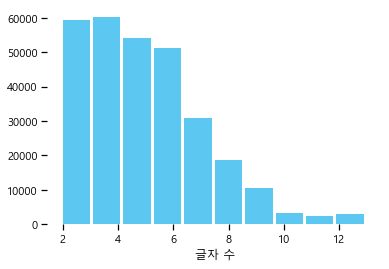

In [41]:
ax = df['crdCoBzkNm'].str.len().hist(color='#5CC8F2', width = 0.99)
ax.set_xlabel('글자 수')
ax.set_ylabel('')
ax.grid(False)
sns.despine(left=True, bottom=True)
plt.savefig('글자수 기준 빈도 히스토그램4.png')

In [18]:
# 예시 데이터
s = pd.Series(['dog','',5,{'foo' : 'bar'},[2, 3, 5, 7],('one', 'two', 'three')])
s

0                  dog
1                     
2                    5
3       {'foo': 'bar'}
4         [2, 3, 5, 7]
5    (one, two, three)
dtype: object

In [19]:
# 예시 데이터
s.str.len()

0    3.0
1    0.0
2    NaN
3    1.0
4    4.0
5    3.0
dtype: float64

In [7]:
# 토큰 길이 데이터 불러오기
final_df = pd.read_csv('Data/df_final.csv')
final_df

crdCoBzkNm  sndCtgyNm  sxClNm  fstCtgyNm  agePrd  crdUseAmt  crdUseCnt  \
0              양식          2       0          0       0      12000          1   
1         일반음식점기타          2       0          0       0     100000          4   
2          일식생선회집          2       0          0       0      12000          1   
3              중식          2       0          0       0      30000          2   
4         커피음료전문점          2       0          0       0      30900          4   
...           ...        ...     ...        ...     ...        ...        ...   
293781   일반치과한방병원         11       1          1       7      49700          1   
293782       종합병원         11       1          1       7      95100          1   
293783         약국         17       1          1       7     122300          1   
293784       화장품점         10       1          2       7      17000          1   
293785       슈퍼마켓         14       1          2       7     134360          8   

        Year  Mouth  crdUseAmt_D_Cnt  ...  737  738  739  740  741  742  743  \
0       2018      1            12000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       2018      1            25000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       2018      1            12000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3       2018      1            15000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       2018      1             7725  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...      ...    ...              ...  ...  ...  ...  ...  ...  ...  ...  ...   
293781  2019     12            49700  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
293782  2019     12            95100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
293783  2019     12           122300  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
293784  2019     12            17000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
293785  2019     12            16795  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        744  745  746  
0       0.0  0.0  0.0  
1       0.0  0.0  0.0  
2       0.0  0.0  0.0  
3       0.0  0.0  0.0  
4       0.0  0.0  0.0  
...     ...  ...  ...  
293781  0.0  0.0  0.0  
293782  0.0  0.0  0.0  
293783  0.0  0.0  0.0  
293784  0.0  0.0  0.0  
293785  0.0  0.0  0.0  

[293786 rows x 756 columns]

In [8]:
# 토큰길이 합치기
fin_DFF = pd.DataFrame()
fin_DFF['len'] = final_df.iloc[:,10:].sum(axis=1)
fin_DFF

len
0       1.0
1       3.0
2       3.0
3       1.0
4       3.0
...     ...
293781  4.0
293782  2.0
293783  1.0
293784  2.0
293785  1.0

[293786 rows x 1 columns]

In [44]:
plt.rcParams['font.family'] = 'NanumGothic' 

In [42]:
plt.rcParams['font.family']='Malgun Gothic'

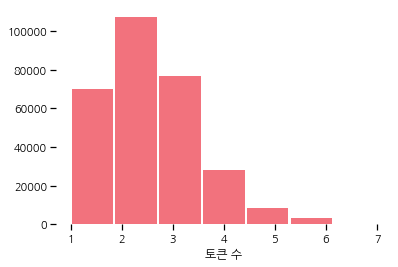

In [45]:
ax = fin_DFF['len'].hist(color='#F2727D',bins=7, rwidth = 0.95)
ax.set_xlabel('토큰 수')
ax.set_ylabel('')
ax.grid(False)
sns.despine(left=True, bottom=True)
#plt.savefig('토큰 수 기준 빈도 히스토그램5.png')